# **Trabalho de analise de dados - TÓPICOS DE BIG DATA EM PYTHON.**

### MATHEUS GABARDO MESSIAS -


## Objetivos:


* Dominar o ambiente de desenvolvimento e SVM.
*   Domicar o ambiente de desenvolvimento e o pacote SVC.
    * Google colab.
        É um ambiente de notebooks que permite a criação de documentos interativos que contenham códigos, mas também textos formatados, imagens, gráficos e equações matemáticas. Sendo executado na nuvem do Google não requer configuração.
    * SVM
        É um algoritmo de aprendizado de máquina supervisionado que pode ser usado para desafios de classificação ou regressão. Seu foco maior é no treinamento e classificação de um dataset.
*   Com base no dataset escolhido implementar um modelo para avaliarmos sua acurácia.
    * Dataset escolhido:
    https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction
    * Os dados são referentes as transações online feitas em determinada rede nos Estados Unidos de 21/06/2020 há 28/06/2020.
*   Explorar funções de modelagem de dados.
*   Exibir dados em gráficos utilizando alguma biblioteca de exibição de dados.
*   Explorar com percentual de base de testes.
*   Aplicar ao modelo os algoritmos SVC, KNN e Árvore.
*   Avalie a diferença da Acurácia entre os percentuais de testes.
*   Elaborar slides para apresentação contendo:
    *   Dados em gráficos utilizando alguma biblioteca de exibição de dados.
    *   Problematização de acordo com os dados colhidos.
    *   Solução para o problema.

In [1]:

# A mportação das bibliotecas é um passo crucial, assim, adquirirmos "ferramentas" para manipular, exibir e tratar os dados.
import pandas as pd
    #Pandas é uma biblioteca de Python amplamente utilizada para manipulação e análise de dados de forma eficiente.
    #com ela podemos ler e escrever dados em vários formatos, realiza operações de limpeza, transformação e agregação de dados.
import numpy as np
    #Fundamental para computação numérica, fornece estruturas de dados eficientes para armazenar e manipular arrays multidimensionais.
    #inclui funções para operações matemáticas avançadas em arrays, como álgebra linear, transformada de Fourier, geração de números aleatórios, entre outras.
import matplotlib.pyplot as plt
        #É especialmente útil para visualização dos dados complexos, oferecendo controle detalhado sobre a aparência dos gráficos.


In [244]:
# Agora iremos importar o Dataset e salvaremos na variavel "database" para maior clareza e manipulação.

database = pd.read_csv('drive/MyDrive/Colab files/BIGDATA em python/fraud-cc.csv')


In [245]:
# Iremos utilizar algumas funções da biblioteca Pandas para analisar os dados, sendo elas: .head(), .tail(), .describe(), .info(), dropna()

In [246]:
# Usando a função .head() iremos visualizar os 3 primeiros registros do dataset.

database.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0


In [247]:
# Usando a função .tail() iremos visualizar os 3 últimos registros do dataset.
database.tail(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
20378,20378,28/06/2020 14:38,3.595190e+15,fraud_Ullrich Ltd,kids_pets,68.38,Dustin,Roberts,M,3283 James Station,...,35.0583,-79.008,238602.0,"Scientist, research (maths)",14/05/1993,1a4c7d0453cf4633823b51422fbd6db4,1.372430e+09,34.203475,-79.748479,0.0
20379,20379,28/06/2020 14:38,6.011110e+15,"fraud_Lesch, D'Amore and Brown",food_dining,51.37,Rebecca,Erickson,F,594 Berry Lights Apt. 392,...,34.2651,-77.867,186140.0,English as a second language teacher,08/02/1983,90269a9778ae69bf6fc03971fd78d9ca,1.372430e+09,33.565702,-78.628640,0.0
20380,20380,28/06/2020 14:38,6.049559e+10,fraud_Schmeler-Howe,personal_care,29.32,Randall,Dillon,M,4440 George Mills Sui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
# Usando a função .describe() iremos visualizar as estatísticas de cada coluna do dataset, isso pode ser útil para resumir
# rapidamente a natureza dos dados e possivelmente identificar possíveis problemas nos dados, como valores ausentes ou inconsistências.

database.describe()

# No nosso caso conseguimos identificar que uma linha do nosso dataset não possui o valor que nos interessa na coluna is_fraud.

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,20381.000000,2.038100e+04,20381.000000,20380.000000,20380.000000,20380.000000,2.038000e+04,2.038000e+04,20380.000000,20380.000000,20380.000000
mean,10190.000000,4.170693e+17,69.044829,48405.327233,38.540346,-90.009991,9.009474e+04,1.372091e+09,38.532696,-90.010424,0.003337
std,5883.632254,1.309311e+18,139.218407,26795.234034,5.081208,13.595052,3.076563e+05,1.860380e+05,5.118150,13.604650,0.057668
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.163455,-166.464422,0.000000
25%,5095.000000,1.800480e+14,9.560000,25442.000000,34.668900,-96.701000,7.590000e+02,1.371928e+09,34.744736,-96.728597,0.000000
50%,10190.000000,3.520550e+15,46.680000,48034.000000,39.390000,-87.349000,2.457000e+03,1.372044e+09,39.403475,-87.280057,0.000000
75%,15285.000000,4.634960e+15,82.240000,71960.000000,42.015800,-80.065200,2.047800e+04,1.372261e+09,41.996093,-80.121836,0.000000
max,20380.000000,4.992350e+18,6600.440000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372430e+09,66.669356,-66.955602,1.000000


In [249]:
# Agora iremos remover as linhas com dados inconsistentes usando a função .dropna().
#(função utilizada para remover valores nulos ou NaN (Not a Number))

database.dropna(subset=['is_fraud'], inplace=True)

In [250]:
# Agora iremos padronizar a data e criar uma nova coluna com apenas a informação do horario das transações.

# Conversão da coluna de data 'trans_date_trans_time' para tipo datetime (padrão para calculos).
database['trans_date_trans_time'] = pd.to_datetime(database['trans_date_trans_time'], dayfirst=True)

# Extração do horario e salvando em uma nova coluna de nome 'hour'.
database['hour'] = database['trans_date_trans_time'].dt.hour


### Com os dados tratados podemos renderizar e analisa-los em forma de gráficos.
Ánalises basicas:
1. Porcentagem de transações fraudulentas.
2. Principais horarios das fraudes.
3. Categorias mais cobiçadas.
4. Estados mais utilizados para fraudes.



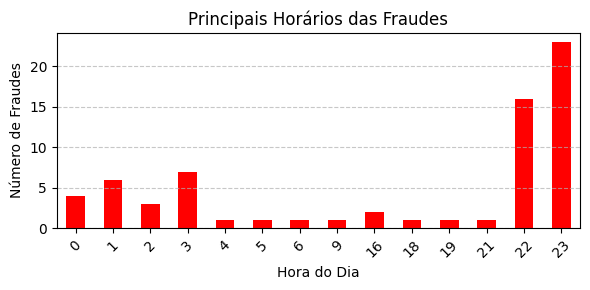

In [251]:
# Gráfico com os principais horários das transações fraudulentas.
fraud_hour_counts = database[database['is_fraud'] == 1]['hour'].value_counts().sort_index()
plt.figure(figsize=(6, 3))
fraud_hour_counts.plot(kind='bar', color='red')
plt.title('Principais Horários das Fraudes')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Fraudes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


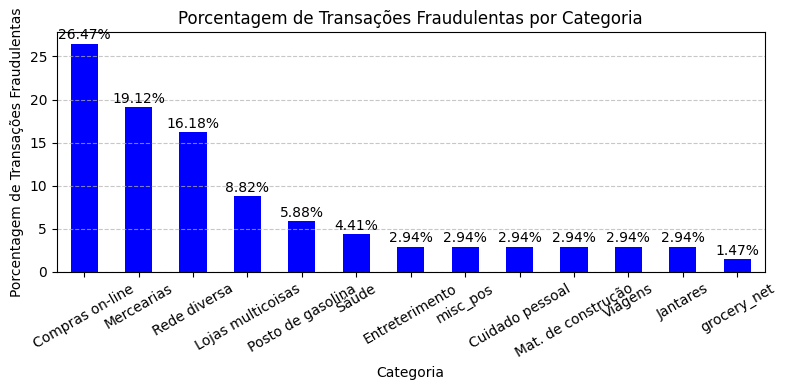

In [252]:
#Array de traduções para "embelezar o grafico"
traducoes = {
    'gas_transport': 'Posto de gasolina',
    'home': 'Mat. de construção',
    'grocery_pos': 'Mercearias',
    'shopping_pos': 'Lojas multicoisas',
    'kids_pets': 'Petshop',
    'shopping_net': 'Compras on-line',
    'food_dining': 'Jantares',
    'personal_care': 'Cuidado pessoal',
    'entertainment': 'Entreterimento',
    'health_fitness': 'Sáude',
    'misc_net': 'Rede diversa',
    'travel': 'Viagens',
}

total_transacoes_fraudulentas = database['is_fraud'].sum() #transações fraudulentas
transacoes_fraudulentas_por_categoria = database[database['is_fraud'] == 1]['category'].value_counts() #transações fraudulentas por categoria
porcentagem_transacoes_fraudulentas_por_categoria = (transacoes_fraudulentas_por_categoria / total_transacoes_fraudulentas) * 100 #porcentagem de transações fraudulentas por categoria
porcentagem_transacoes_fraudulentas_por_categoria = porcentagem_transacoes_fraudulentas_por_categoria.sort_values(ascending=False) # ordenação das categorias por porcentagem


#Gráfico com as categorias mais cobiçadas.
plt.figure(figsize=(8, 4))
porcentagem_transacoes_fraudulentas_por_categoria.plot(kind='bar', color='blue')
plt.title('Porcentagem de Transações Fraudulentas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Porcentagem de Transações Fraudulentas')
plt.xticks(rotation=30)

#Legenda para os dados (previamente testados preparados)
for i, v in enumerate(porcentagem_transacoes_fraudulentas_por_categoria):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')

plt.gca().set_xticklabels([traducoes.get(label, label) for label in porcentagem_transacoes_fraudulentas_por_categoria.index])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


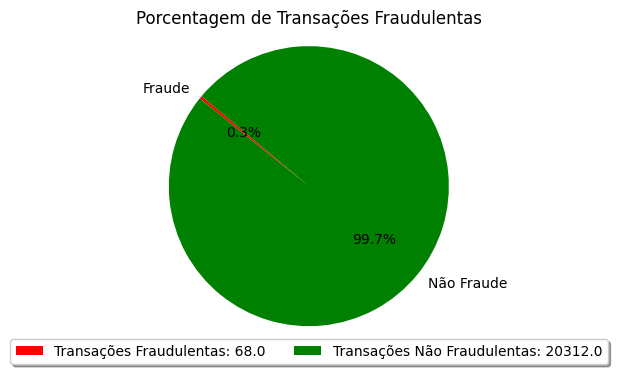

In [253]:
fraud_percentage = (database['is_fraud'].sum() / len(database)) * 100 # Porcentagem de transações fraudulentas.
non_fraud_percentage = 100 - fraud_percentage # Porcentagem de transações não fraudulentas.
total_transacoes_nao_fraudulentas = len(database) - database['is_fraud'].sum()


# Configs para o gráfico de pizza.
labels = ['Fraude', 'Não Fraude']
sizes = [fraud_percentage, non_fraud_percentage]
colors = ['red', 'green']

# Gráfico de pizza.
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Legenda dos valores em baixo do gráfico.
legend_labels = [f'Transações Fraudulentas: {total_transacoes_fraudulentas}', f'Transações Não Fraudulentas: {total_transacoes_nao_fraudulentas}']
plt.legend(legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)

plt.title('Porcentagem de Transações Fraudulentas')
plt.axis('equal')
plt.show()

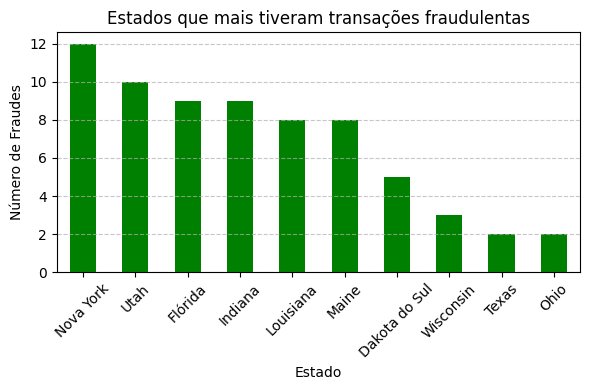

In [254]:
# Estados que mais tiveram transações fraudulentas.

traducoes_estados = {
    'NY': 'Nova York',
    'AL': 'Utah',
    'FL': 'Flórida',
    'IN': 'Indiana',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'SD': 'Dakota do Sul',
    'WI': 'Wisconsin',
    'TX': 'Texas',
    'OH': 'Ohio'
}
quantidade_fraudes_estado = database[database['is_fraud'] == 1]['state'].value_counts().nlargest(10) #estados que mais tiveram transações fraudulentas.
quantidade_fraudes_estado.index = quantidade_fraudes_estado.index.map(traducoes_estados) # Substituindo siglas dos estados pelos nomes

plt.figure(figsize=(6, 4))
quantidade_fraudes_estado.plot(kind='bar', color='green')
plt.title('Estados que mais tiveram transações fraudulentas')
plt.xlabel('Estado')
plt.ylabel('Número de Fraudes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Com todos os dados analisados e separados agora partiremos para o treinamento dos modelos, a avaliação dos modelos e a comparação dos resultados.
Primeiro iremos retirar as colunas inúteis.

In [255]:
array_colunas_inuteis = ['trans_date_trans_time', 'merch_long', 'merch_lat', 'unix_time', 'trans_num', 'job', 'city_pop', 'long', 'lat', 'zip', 'city', 'gender', 'first', 'last', 'cc_num', 'Unnamed: 0']

database = database.drop(array_colunas_inuteis, axis=1)

database.info()
database.head()


<class 'pandas.core.frame.DataFrame'>
Index: 20380 entries, 0 to 20379
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   merchant  20380 non-null  object 
 1   category  20380 non-null  object 
 2   amt       20380 non-null  float64
 3   street    20380 non-null  object 
 4   state     20380 non-null  object 
 5   dob       20380 non-null  object 
 6   is_fraud  20380 non-null  float64
 7   hour      20380 non-null  int32  
dtypes: float64(2), int32(1), object(5)
memory usage: 1.3+ MB


,merchant,category,amt,street,state,dob,is_fraud,hour
0,fraud_Kirlin and Sons,personal_care,2.86,351 Darlene Green,SC,19/03/1968,0.0,12
1,fraud_Sporer-Keebler,personal_care,29.84,3638 Marsh Union,UT,17/01/1990,0.0,12
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,9333 Valentine Point,NY,21/10/1970,0.0,12
3,fraud_Haley Group,misc_pos,60.05,32941 Krystal Mill Apt. 552,FL,25/07/1987,0.0,12
4,fraud_Johnston-Casper,travel,3.19,5783 Evan Roads Apt. 465,MI,06/07/1955,0.0,12


In [256]:
#Tratando os dados ausentes
database.dropna(inplace=True)
#Convertendo dob para datetime
database['dob'] = pd.to_datetime(database['dob'], dayfirst=True)


In [257]:
#Dividindo os dados em conjuntos de treinamento e teste

from sklearn.model_selection import train_test_split

# Definindo os recursos (features) e o alvo (target)
X = database[['amt']]
y = database['is_fraud']

# Dividindo os dados em conjuntos de treinamento e teste (30% e 50%)
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, y, test_size=0.5, random_state=42)


In [258]:
#treinando o modelo SVC
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_30, y_train_30)


#treinando o modelo KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_30, y_train_30)

#treinando o modelo Arvore
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_30, y_train_30)


DecisionTreeClassifier()

In [262]:
print('Avaliando os modelos 30%')
# Fazendo previsões e calculando a acurácia para o modelo SVC (30%)
svc_accuracy_30 = svc_model.score(X_test_30, y_test_30)
print("Acurácia do modelo SVC (30% de teste):", svc_accuracy_30)
# Fazendo previsões e calculando a acurácia para o modelo KNN (30%)
knn_accuracy_30 = knn_model.score(X_test_30, y_test_30)
print("Acurácia do modelo KNN (30% de teste):", knn_accuracy_30)
# Fazendo previsões e calculando a acurácia para o modelo Árvore de Decisão (30%)
tree_accuracy_30 = tree_model.score(X_test_30, y_test_30)
print("Acurácia do modelo Tree (30% de teste):", tree_accuracy_30)

print('-')
print('Avaliando os modelos 50%')
# Fazendo previsões e calculando a acurácia para o modelo SVC (50%)
svc_accuracy_50 = svc_model.score(X_test_50, y_test_50)
print("Acurácia do modelo SVC (50% de teste):", svc_accuracy_50)
# Fazendo previsões e calculando a acurácia para o modelo KNN (50%)
knn_accuracy_50 = knn_model.score(X_test_50, y_test_50)
print("Acurácia do modelo KNN (50% de teste):", knn_accuracy_50)
# Fazendo previsões e calculando a acurácia para o modelo Árvore de Decisão (50%)
tree_accuracy_50 = tree_model.score(X_test_50, y_test_50)
print("Acurácia do modelo Tree (50% de teste):", tree_accuracy_50)


Avaliando os modelos 30%
Acurácia do modelo SVC (30% de teste): 0.9955839057899902
Acurácia do modelo KNN (30% de teste): 0.9952567877003599
Acurácia do modelo Tree (30% de teste): 0.994438992476284
-
Avaliando os modelos 50%
Acurácia do modelo SVC (50% de teste): 0.9964671246319922
Acurácia do modelo KNN (50% de teste): 0.9960745829244357
Acurácia do modelo Tree (50% de teste): 0.9965652600588812


In [264]:
# Comparando as acurácias dos modelos para os percentuais de testes de 30% e 50%
print("Diferença de acurácia entre 30% e 50% para o modelo SVC:", svc_accuracy_30 - svc_accuracy_50)

# Comparando as acurácias dos modelos para os percentuais de testes de 30% e 50% para KNN
print("Diferença de acurácia entre 30% e 50% para o modelo KNN:", knn_accuracy_30 - knn_accuracy_50)

# Comparando as acurácias dos modelos para os percentuais de testes de 30% e 50% para Árvore de Decisão
print("Diferença de acurácia entre 30% e 50% para o modelo Tree:", tree_accuracy_30 - tree_accuracy_50)


Diferença de acurácia entre 30% e 50% para o modelo SVC: -0.0008832188420019316
Diferença de acurácia entre 30% e 50% para o modelo KNN: -0.000817795224075879
Diferença de acurácia entre 30% e 50% para o modelo Tree: -0.0021262675825972632
